In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import yfinance as yf
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.stats import linregress

In [2]:
def droite_reg(ticket):
    data = yf.download([ticket], start='1990-12-10', end=date.today(), group_by='ticker')
    table_droite_reg = data.loc[:,[('Close')]]
    table_droite_reg['Date']=table_droite_reg.index
    table_droite_reg['Date2']=table_droite_reg.index
    table_droite_reg['Date2']=table_droite_reg['Date2'].astype('datetime64').astype(int).astype(float)
    table_droite_reg["log"] = np.log10(table_droite_reg['Close'])
    res = linregress(table_droite_reg["Date2"],table_droite_reg["log"])
    table_droite_reg["Reg"]=res.intercept + res.slope*table_droite_reg["Date2"]
    EC=np.std(table_droite_reg["log"]-table_droite_reg["Reg"])
    table_droite_reg["+EC"] = table_droite_reg["Reg"]+EC
    table_droite_reg["+2EC"] = table_droite_reg["Reg"]+2*EC
    table_droite_reg["-EC"] = table_droite_reg["Reg"]-EC
    table_droite_reg["-2EC"] = table_droite_reg["Reg"]-2*EC
    return table_droite_reg

In [3]:
def print_droite_reg(table_droite_reg):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(300)
    ax1.plot(table_droite_reg["Date"],table_droite_reg["Close"],color='blue')
    ax2.plot(table_droite_reg["Date"],table_droite_reg["Reg"],color='red')
    ax2.plot(table_droite_reg["Date"],table_droite_reg["+EC"],color='black',linestyle='dashed',linewidth=2, markersize=8)
    ax2.plot(table_droite_reg["Date"],table_droite_reg["+2EC"],color='black',linestyle='dashed',linewidth=2, markersize=8)
    ax2.plot(table_droite_reg["Date"],table_droite_reg["-EC"],color='black',linestyle='dashed',linewidth=2, markersize=8)
    ax2.plot(table_droite_reg["Date"],table_droite_reg["-2EC"],color='black',linestyle='dashed',linewidth=2, markersize=8)
    ax1.set_yscale('log')
    y1=table_droite_reg["-2EC"][0]
    y2=table_droite_reg["+2EC"][-1]
    ax1.set_ylim([10**(y1),10**(y2)])
    ax2.set_ylim([y1,y2])
    plt.title("Linear regression of " + str(ticket))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price of the stock')

[*********************100%***********************]  1 of 1 completed


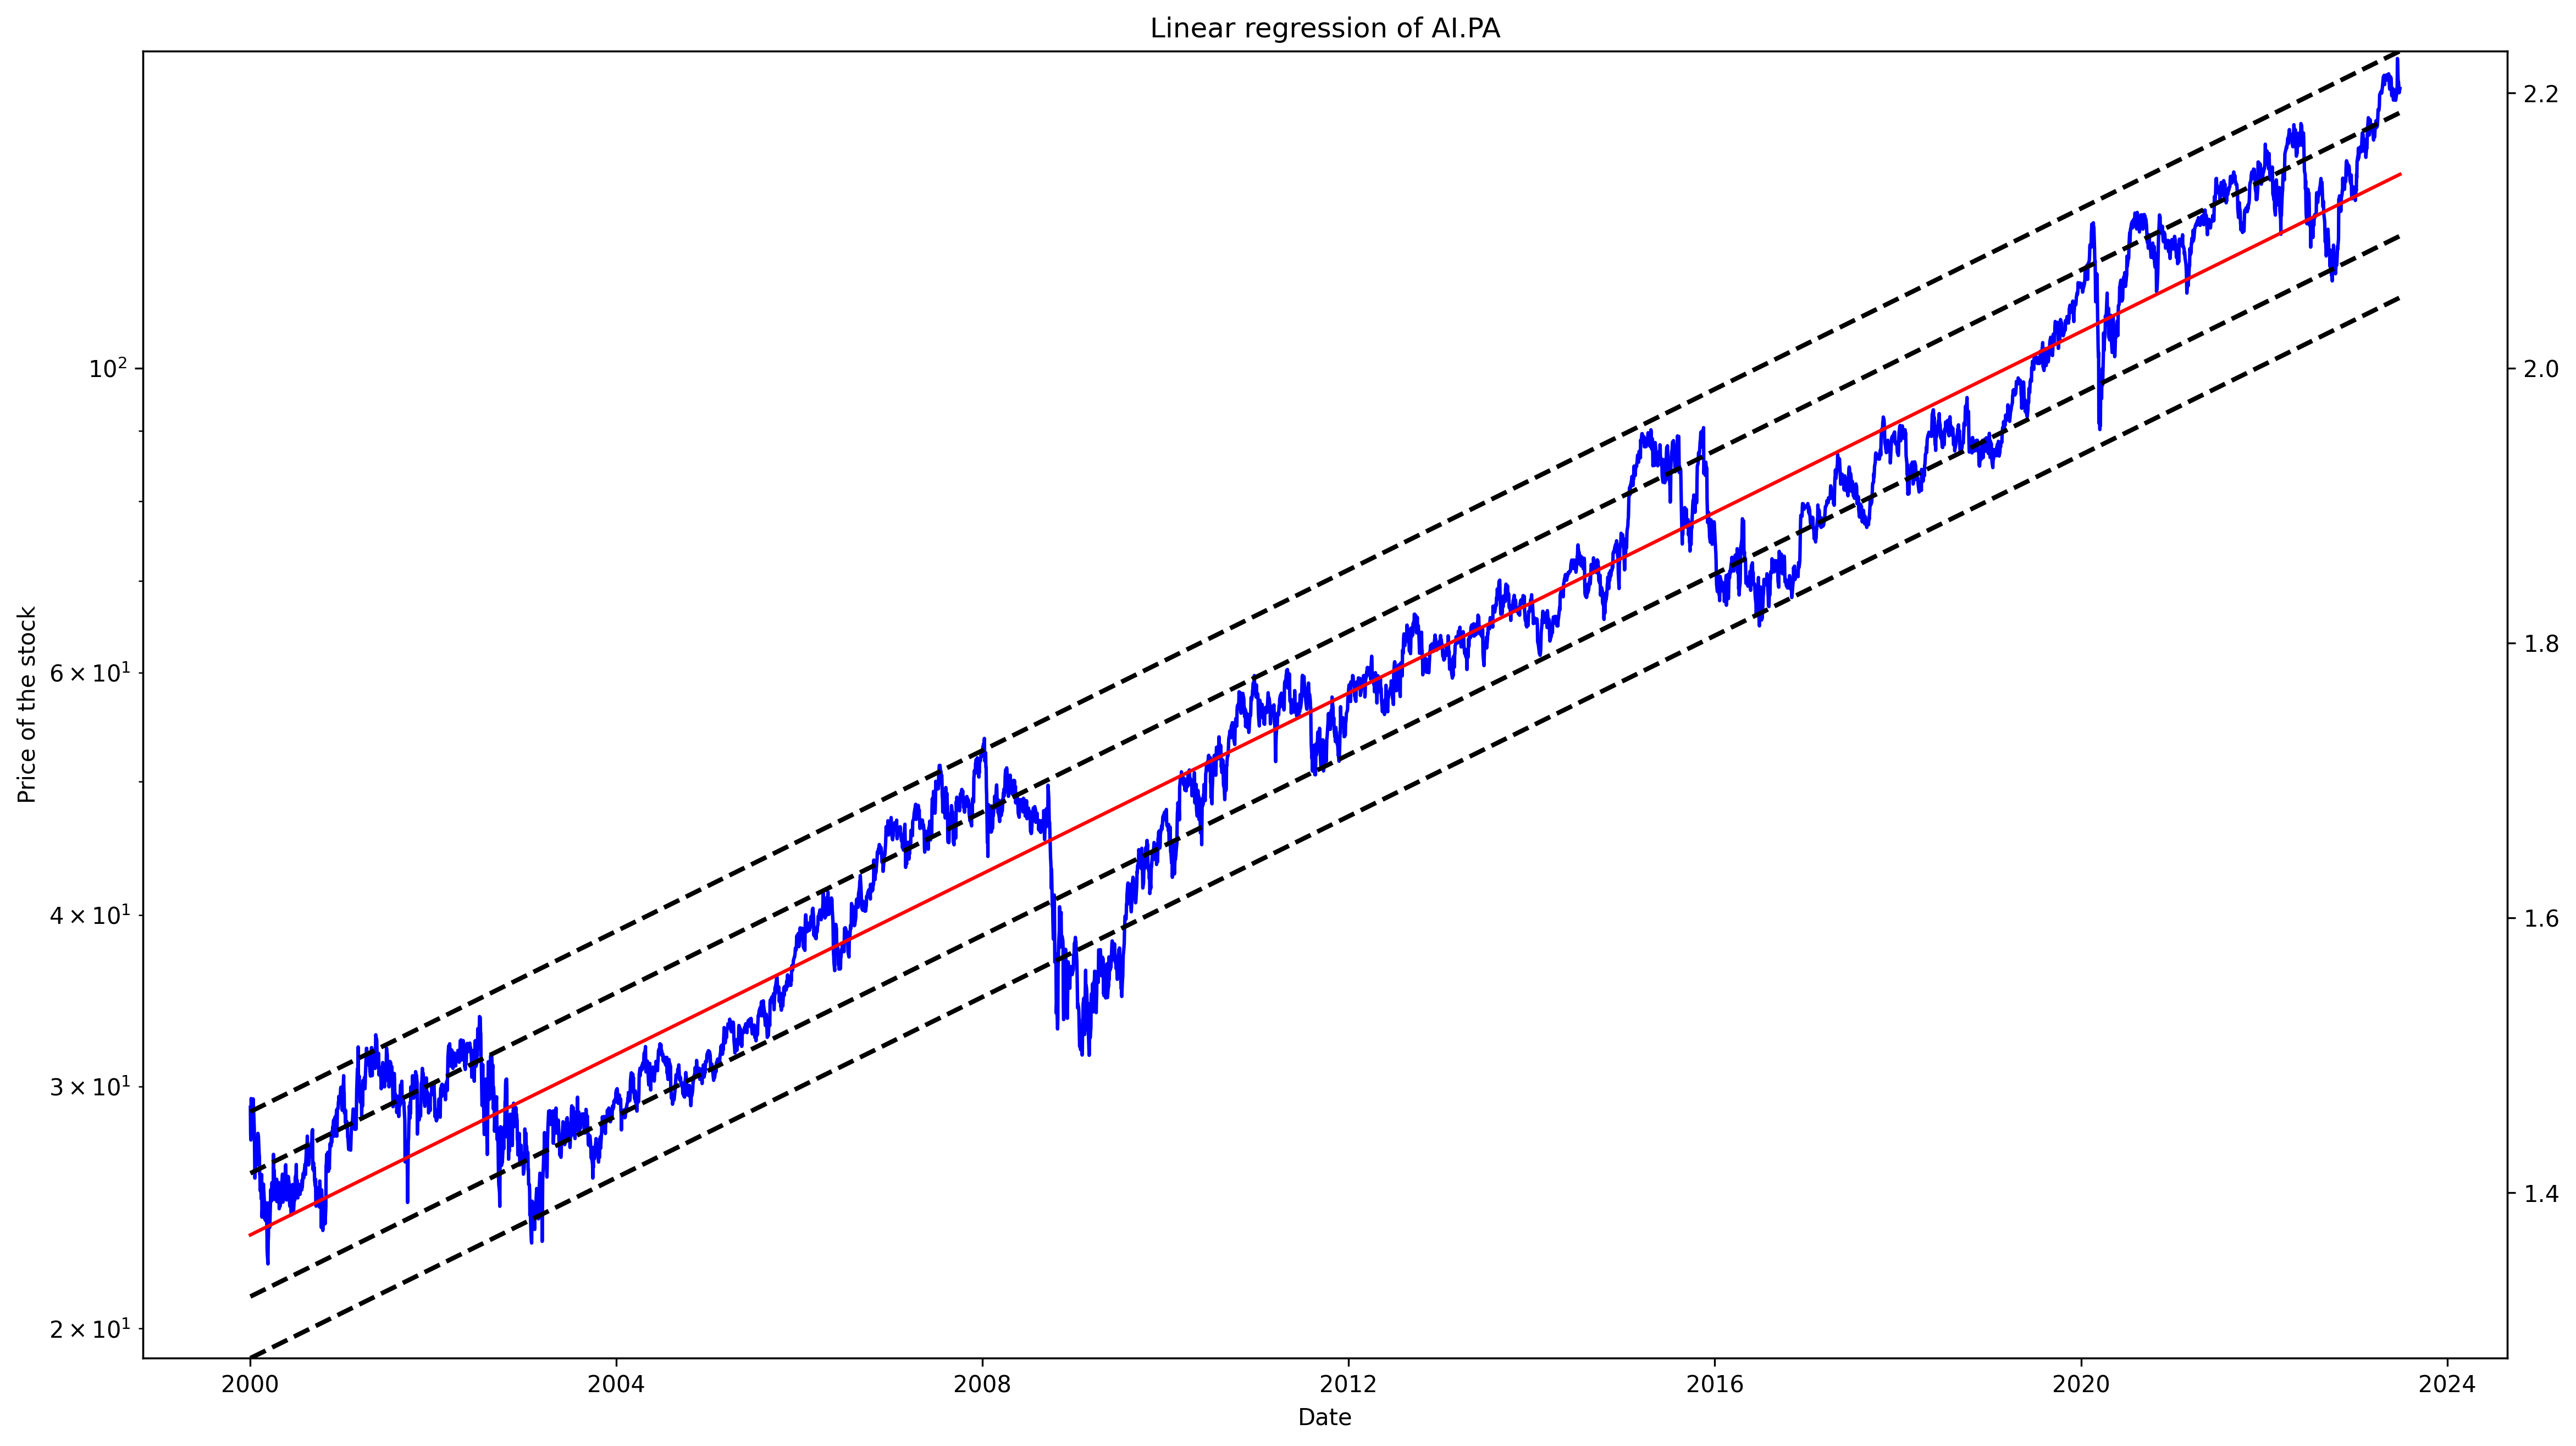

In [4]:
ticket="AI.PA"
print_droite_reg(droite_reg(ticket))

Made by Clément ROUILLARD